In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
MY_BOUNDED_SET = 45000

num_input = 3
num_output = 3

num_hidden1 = 16
num_hidden2 = 16

N_EPOCHS = 10000
epoch = 0
train_rmse_list = []
test_rmse_list = []

session = tf.Session()

In [3]:
x = tf.placeholder(tf.float32, shape=[None, num_input])

y_true = tf.placeholder(tf.float32, shape=[None, num_output], name='y_true')
y_pred = tf.placeholder(tf.float32, shape=[None, num_output])

In [4]:
data_csv = pd.read_csv('../myCSVData.csv')
X = data_csv[['in1','in2','in3']]
y = data_csv[['out1','out2','out3']]
#X, y

In [5]:
X_train_pd = X[:MY_BOUNDED_SET]
X_test_pd = X[MY_BOUNDED_SET:]
y_train_pd = y[:MY_BOUNDED_SET]
y_test_pd = y[MY_BOUNDED_SET:]

X_train = X_train_pd.values
X_train = X_train.astype(np.float32)

y_train = y_train_pd.values
y_train = y_train.astype(np.float32)

X_test = X_test_pd.values
X_test = X_test.astype(np.float32)

y_test = y_test_pd.values
y_test = y_test.astype(np.float32)

print (X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(45000, 3) (45000, 3) (7949, 3) (7949, 3)


In [6]:
# Evaluation
#rmse_a = tf.placeholder(tf.float32, [None, 3])
#rmse_b = tf.placeholder(tf.float32, [None, 3])
#rmse = tf.reduce_mean(tf.square(rmse_a - rmse_b))
rmse_a = []

In [7]:
def cost_func(layer, my_y_true):
    ret = tf.sqrt(tf.reduce_mean(tf.square(layer - my_y_true)))
    #print (layer , my_y_true)
    #ret = tf.reduce_mean(tf.square(layer))
    return ret
            

In [8]:
X_train

array([[0.0827067, 0.740974 , 0.36644  ],
       [0.0827297, 0.740762 , 0.365998 ],
       [0.082753 , 0.74055  , 0.365552 ],
       ...,
       [0.615973 , 0.615452 , 0.0603018],
       [0.607584 , 0.616838 , 0.0577194],
       [0.599019 , 0.618318 , 0.0552926]], dtype=float32)

In [9]:
# Neural Network Structure
inputs = X_train

# Input Layer
input_layer = tf.Variable(inputs)

# Hidden Layer #1
h1 = tf.layers.dense(inputs=input_layer, 
                     units=num_hidden1,
                     use_bias=True,
                     activation=tf.nn.relu)
   
# Hidden Layer #2
h2 = tf.layers.dense(inputs=h1, 
                     units=num_hidden2,
                     use_bias=True,
                     activation=tf.nn.relu)
    
# Output Layer
output_layer = tf.layers.dense(inputs=h2, 
                     units=num_output,
                     use_bias=True,
                     activation=None)


In [10]:
#cost = tf.sqrt(tf.reduce_mean(tf.square(tf.subtract(output_layer , y_true))))
#cost = tf.reduce_mean(tf.square(tf.subtract(output_layer, y_true)))
#cost = tf.reduce_mean(output_layer)
cost = cost_func(output_layer,y_true)
output_layer

<tf.Tensor 'dense_3/BiasAdd:0' shape=(45000, 3) dtype=float32>

In [11]:
optimizer = tf.train.AdamOptimizer(learning_rate=1e-4).minimize(cost)

In [12]:
session.run(tf.global_variables_initializer())

In [13]:
#print (session.run(tf.subtract(output_layer,y_true)).shape)
#print (X_train.shape)

In [14]:
print (y_true.shape)

(?, 3)


In [15]:
def train(N_EPOCHS):
    #global epoch
    global rmse_a
    for i in range(epoch, epoch + N_EPOCHS):
        feed_dict_train = {x: X_train,
                      y_true:y_train}

        
        session.run(optimizer, feed_dict=feed_dict_train)
        #epoch+=1
        cost_error = session.run(cost,feed_dict=feed_dict_train)
        print ("[" +str(i+1) +"]")
        print ("Train Accuracy : " , cost_error)
        
        rmse_a += [cost_error]

In [16]:
def predict():
    session.run(tf.global_variables_initializer())
    feed_dict_test = {x: X_test,
                    y_true:y_test}
    print ("Test Accuracy : " , session.run(cost,feed_dict=feed_dict_test))

In [17]:
train(N_EPOCHS)
#predict()
output_layer

[1]
Train Accuracy :  0.52559227
[2]
Train Accuracy :  0.5251456
[3]
Train Accuracy :  0.524697
[4]
Train Accuracy :  0.5242485
[5]
Train Accuracy :  0.52380157
[6]
Train Accuracy :  0.52335435
[7]
Train Accuracy :  0.52290726
[8]
Train Accuracy :  0.5224605
[9]
Train Accuracy :  0.5220147
[10]
Train Accuracy :  0.5215684
[11]
Train Accuracy :  0.5211218
[12]
Train Accuracy :  0.52067673
[13]
Train Accuracy :  0.5202308
[14]
Train Accuracy :  0.51978594
[15]
Train Accuracy :  0.51934135
[16]
Train Accuracy :  0.5188974
[17]
Train Accuracy :  0.518453
[18]
Train Accuracy :  0.51800877
[19]
Train Accuracy :  0.51756644
[20]
Train Accuracy :  0.5171225
[21]
Train Accuracy :  0.51667964
[22]
Train Accuracy :  0.51623714
[23]
Train Accuracy :  0.515795
[24]
Train Accuracy :  0.51535267
[25]
Train Accuracy :  0.51491094
[26]
Train Accuracy :  0.5144693
[27]
Train Accuracy :  0.51402843
[28]
Train Accuracy :  0.5135871
[29]
Train Accuracy :  0.51314706
[30]
Train Accuracy :  0.5127061
[31]
Tr

[241]
Train Accuracy :  0.4215695
[242]
Train Accuracy :  0.42110157
[243]
Train Accuracy :  0.42063493
[244]
Train Accuracy :  0.4201671
[245]
Train Accuracy :  0.41969803
[246]
Train Accuracy :  0.41922888
[247]
Train Accuracy :  0.418758
[248]
Train Accuracy :  0.4182872
[249]
Train Accuracy :  0.4178158
[250]
Train Accuracy :  0.41734403
[251]
Train Accuracy :  0.41687158
[252]
Train Accuracy :  0.41640002
[253]
Train Accuracy :  0.41592765
[254]
Train Accuracy :  0.41545454
[255]
Train Accuracy :  0.4149822
[256]
Train Accuracy :  0.4145089
[257]
Train Accuracy :  0.4140364
[258]
Train Accuracy :  0.41356304
[259]
Train Accuracy :  0.41308942
[260]
Train Accuracy :  0.41261554
[261]
Train Accuracy :  0.41214216
[262]
Train Accuracy :  0.41166878
[263]
Train Accuracy :  0.41119447
[264]
Train Accuracy :  0.4107211
[265]
Train Accuracy :  0.41024697
[266]
Train Accuracy :  0.40977377
[267]
Train Accuracy :  0.40929893
[268]
Train Accuracy :  0.408824
[269]
Train Accuracy :  0.408349

[478]
Train Accuracy :  0.31744286
[479]
Train Accuracy :  0.31706652
[480]
Train Accuracy :  0.31669238
[481]
Train Accuracy :  0.3163183
[482]
Train Accuracy :  0.31594503
[483]
Train Accuracy :  0.3155727
[484]
Train Accuracy :  0.3152014
[485]
Train Accuracy :  0.31483072
[486]
Train Accuracy :  0.31446052
[487]
Train Accuracy :  0.3140919
[488]
Train Accuracy :  0.31372368
[489]
Train Accuracy :  0.31335652
[490]
Train Accuracy :  0.31299058
[491]
Train Accuracy :  0.31262502
[492]
Train Accuracy :  0.31226096
[493]
Train Accuracy :  0.31189772
[494]
Train Accuracy :  0.3115352
[495]
Train Accuracy :  0.3111737
[496]
Train Accuracy :  0.31081364
[497]
Train Accuracy :  0.3104539
[498]
Train Accuracy :  0.3100961
[499]
Train Accuracy :  0.30973879
[500]
Train Accuracy :  0.30938262
[501]
Train Accuracy :  0.30902752
[502]
Train Accuracy :  0.30867374
[503]
Train Accuracy :  0.30832106
[504]
Train Accuracy :  0.30796915
[505]
Train Accuracy :  0.3076184
[506]
Train Accuracy :  0.307

[715]
Train Accuracy :  0.24670285
[716]
Train Accuracy :  0.24641919
[717]
Train Accuracy :  0.24613525
[718]
Train Accuracy :  0.24585153
[719]
Train Accuracy :  0.24556752
[720]
Train Accuracy :  0.24528316
[721]
Train Accuracy :  0.24499889
[722]
Train Accuracy :  0.24471447
[723]
Train Accuracy :  0.24442986
[724]
Train Accuracy :  0.24414513
[725]
Train Accuracy :  0.24385996
[726]
Train Accuracy :  0.24357504
[727]
Train Accuracy :  0.24328952
[728]
Train Accuracy :  0.24300434
[729]
Train Accuracy :  0.24271917
[730]
Train Accuracy :  0.24243294
[731]
Train Accuracy :  0.24214733
[732]
Train Accuracy :  0.24186099
[733]
Train Accuracy :  0.2415746
[734]
Train Accuracy :  0.24128854
[735]
Train Accuracy :  0.24100173
[736]
Train Accuracy :  0.24071492
[737]
Train Accuracy :  0.2404279
[738]
Train Accuracy :  0.24014118
[739]
Train Accuracy :  0.23985387
[740]
Train Accuracy :  0.2395665
[741]
Train Accuracy :  0.2392785
[742]
Train Accuracy :  0.23899052
[743]
Train Accuracy :  

[952]
Train Accuracy :  0.17400295
[953]
Train Accuracy :  0.17367993
[954]
Train Accuracy :  0.1733567
[955]
Train Accuracy :  0.17303361
[956]
Train Accuracy :  0.17271104
[957]
Train Accuracy :  0.17238827
[958]
Train Accuracy :  0.17206538
[959]
Train Accuracy :  0.17174272
[960]
Train Accuracy :  0.1714201
[961]
Train Accuracy :  0.17109771
[962]
Train Accuracy :  0.17077537
[963]
Train Accuracy :  0.17045324
[964]
Train Accuracy :  0.17013113
[965]
Train Accuracy :  0.1698091
[966]
Train Accuracy :  0.16948712
[967]
Train Accuracy :  0.16916542
[968]
Train Accuracy :  0.1688435
[969]
Train Accuracy :  0.16852222
[970]
Train Accuracy :  0.16820091
[971]
Train Accuracy :  0.16787983
[972]
Train Accuracy :  0.16755864
[973]
Train Accuracy :  0.16723777
[974]
Train Accuracy :  0.16691704
[975]
Train Accuracy :  0.16659653
[976]
Train Accuracy :  0.16627638
[977]
Train Accuracy :  0.165956
[978]
Train Accuracy :  0.16563585
[979]
Train Accuracy :  0.16531609
[980]
Train Accuracy :  0.

[1183]
Train Accuracy :  0.10945758
[1184]
Train Accuracy :  0.10924201
[1185]
Train Accuracy :  0.10902722
[1186]
Train Accuracy :  0.10881273
[1187]
Train Accuracy :  0.10859894
[1188]
Train Accuracy :  0.10838575
[1189]
Train Accuracy :  0.10817328
[1190]
Train Accuracy :  0.107961476
[1191]
Train Accuracy :  0.10775016
[1192]
Train Accuracy :  0.10753945
[1193]
Train Accuracy :  0.107329495
[1194]
Train Accuracy :  0.10712007
[1195]
Train Accuracy :  0.10691124
[1196]
Train Accuracy :  0.106703036
[1197]
Train Accuracy :  0.10649559
[1198]
Train Accuracy :  0.10628855
[1199]
Train Accuracy :  0.10608219
[1200]
Train Accuracy :  0.10587641
[1201]
Train Accuracy :  0.10567144
[1202]
Train Accuracy :  0.10546695
[1203]
Train Accuracy :  0.10526292
[1204]
Train Accuracy :  0.1050597
[1205]
Train Accuracy :  0.104857005
[1206]
Train Accuracy :  0.104655065
[1207]
Train Accuracy :  0.104453795
[1208]
Train Accuracy :  0.104252875
[1209]
Train Accuracy :  0.104052655
[1210]
Train Accuracy

[1411]
Train Accuracy :  0.07231699
[1412]
Train Accuracy :  0.07217822
[1413]
Train Accuracy :  0.072039545
[1414]
Train Accuracy :  0.071901366
[1415]
Train Accuracy :  0.07176375
[1416]
Train Accuracy :  0.07162633
[1417]
Train Accuracy :  0.071489275
[1418]
Train Accuracy :  0.07135242
[1419]
Train Accuracy :  0.07121576
[1420]
Train Accuracy :  0.07107937
[1421]
Train Accuracy :  0.0709433
[1422]
Train Accuracy :  0.070807405
[1423]
Train Accuracy :  0.07067186
[1424]
Train Accuracy :  0.07053651
[1425]
Train Accuracy :  0.070401475
[1426]
Train Accuracy :  0.07026669
[1427]
Train Accuracy :  0.07013209
[1428]
Train Accuracy :  0.06999789
[1429]
Train Accuracy :  0.06986391
[1430]
Train Accuracy :  0.069730416
[1431]
Train Accuracy :  0.069597244
[1432]
Train Accuracy :  0.06946429
[1433]
Train Accuracy :  0.06933221
[1434]
Train Accuracy :  0.069201
[1435]
Train Accuracy :  0.069070466
[1436]
Train Accuracy :  0.06894016
[1437]
Train Accuracy :  0.06881044
[1438]
Train Accuracy :

[1637]
Train Accuracy :  0.047178023
[1638]
Train Accuracy :  0.047070973
[1639]
Train Accuracy :  0.0469646
[1640]
Train Accuracy :  0.04685885
[1641]
Train Accuracy :  0.04675367
[1642]
Train Accuracy :  0.046649016
[1643]
Train Accuracy :  0.046545044
[1644]
Train Accuracy :  0.04644166
[1645]
Train Accuracy :  0.04633874
[1646]
Train Accuracy :  0.046236455
[1647]
Train Accuracy :  0.046134587
[1648]
Train Accuracy :  0.046033252
[1649]
Train Accuracy :  0.045932427
[1650]
Train Accuracy :  0.04583203
[1651]
Train Accuracy :  0.04573217
[1652]
Train Accuracy :  0.045632653
[1653]
Train Accuracy :  0.045533523
[1654]
Train Accuracy :  0.045434777
[1655]
Train Accuracy :  0.045336474
[1656]
Train Accuracy :  0.04523853
[1657]
Train Accuracy :  0.045140952
[1658]
Train Accuracy :  0.04504371
[1659]
Train Accuracy :  0.044946857
[1660]
Train Accuracy :  0.044850312
[1661]
Train Accuracy :  0.044754103
[1662]
Train Accuracy :  0.044658132
[1663]
Train Accuracy :  0.04456257
[1664]
Train

[1861]
Train Accuracy :  0.029088162
[1862]
Train Accuracy :  0.029021682
[1863]
Train Accuracy :  0.028955312
[1864]
Train Accuracy :  0.028888967
[1865]
Train Accuracy :  0.028822733
[1866]
Train Accuracy :  0.028756581
[1867]
Train Accuracy :  0.028690489
[1868]
Train Accuracy :  0.02862451
[1869]
Train Accuracy :  0.028558644
[1870]
Train Accuracy :  0.028492834
[1871]
Train Accuracy :  0.02842711
[1872]
Train Accuracy :  0.028361525
[1873]
Train Accuracy :  0.02829605
[1874]
Train Accuracy :  0.028230665
[1875]
Train Accuracy :  0.028165383
[1876]
Train Accuracy :  0.02810024
[1877]
Train Accuracy :  0.02803522
[1878]
Train Accuracy :  0.027970271
[1879]
Train Accuracy :  0.027905475
[1880]
Train Accuracy :  0.027840767
[1881]
Train Accuracy :  0.027776172
[1882]
Train Accuracy :  0.0277117
[1883]
Train Accuracy :  0.027647337
[1884]
Train Accuracy :  0.027583066
[1885]
Train Accuracy :  0.027518936
[1886]
Train Accuracy :  0.02745491
[1887]
Train Accuracy :  0.027391
[1888]
Train

[2084]
Train Accuracy :  0.017536331
[2085]
Train Accuracy :  0.017497927
[2086]
Train Accuracy :  0.017459597
[2087]
Train Accuracy :  0.017421342
[2088]
Train Accuracy :  0.017383164
[2089]
Train Accuracy :  0.017345054
[2090]
Train Accuracy :  0.017307013
[2091]
Train Accuracy :  0.017269079
[2092]
Train Accuracy :  0.017231219
[2093]
Train Accuracy :  0.017193425
[2094]
Train Accuracy :  0.017155739
[2095]
Train Accuracy :  0.017118132
[2096]
Train Accuracy :  0.017080614
[2097]
Train Accuracy :  0.017043194
[2098]
Train Accuracy :  0.017005812
[2099]
Train Accuracy :  0.016968526
[2100]
Train Accuracy :  0.016931288
[2101]
Train Accuracy :  0.01689411
[2102]
Train Accuracy :  0.016857022
[2103]
Train Accuracy :  0.016819982
[2104]
Train Accuracy :  0.016783027
[2105]
Train Accuracy :  0.016746145
[2106]
Train Accuracy :  0.016709367
[2107]
Train Accuracy :  0.016672665
[2108]
Train Accuracy :  0.016636048
[2109]
Train Accuracy :  0.016599486
[2110]
Train Accuracy :  0.016563019
[2

[2306]
Train Accuracy :  0.010636361
[2307]
Train Accuracy :  0.010610421
[2308]
Train Accuracy :  0.010584506
[2309]
Train Accuracy :  0.010558628
[2310]
Train Accuracy :  0.010532779
[2311]
Train Accuracy :  0.010506946
[2312]
Train Accuracy :  0.0104811555
[2313]
Train Accuracy :  0.010455382
[2314]
Train Accuracy :  0.010429619
[2315]
Train Accuracy :  0.0104038995
[2316]
Train Accuracy :  0.010378192
[2317]
Train Accuracy :  0.010352531
[2318]
Train Accuracy :  0.010326858
[2319]
Train Accuracy :  0.010301228
[2320]
Train Accuracy :  0.010275637
[2321]
Train Accuracy :  0.010250084
[2322]
Train Accuracy :  0.010224541
[2323]
Train Accuracy :  0.010199032
[2324]
Train Accuracy :  0.010173566
[2325]
Train Accuracy :  0.010148129
[2326]
Train Accuracy :  0.010122721
[2327]
Train Accuracy :  0.010097328
[2328]
Train Accuracy :  0.010071949
[2329]
Train Accuracy :  0.010046594
[2330]
Train Accuracy :  0.010021279
[2331]
Train Accuracy :  0.009995997
[2332]
Train Accuracy :  0.009970728

[2527]
Train Accuracy :  0.0054504373
[2528]
Train Accuracy :  0.0054295617
[2529]
Train Accuracy :  0.005408715
[2530]
Train Accuracy :  0.0053878943
[2531]
Train Accuracy :  0.0053671
[2532]
Train Accuracy :  0.005346336
[2533]
Train Accuracy :  0.0053256005
[2534]
Train Accuracy :  0.005304876
[2535]
Train Accuracy :  0.0052841753
[2536]
Train Accuracy :  0.005263503
[2537]
Train Accuracy :  0.005242857
[2538]
Train Accuracy :  0.005222233
[2539]
Train Accuracy :  0.005201651
[2540]
Train Accuracy :  0.0051811147
[2541]
Train Accuracy :  0.005160629
[2542]
Train Accuracy :  0.0051401933
[2543]
Train Accuracy :  0.0051197833
[2544]
Train Accuracy :  0.005099401
[2545]
Train Accuracy :  0.005079055
[2546]
Train Accuracy :  0.0050587477
[2547]
Train Accuracy :  0.005038477
[2548]
Train Accuracy :  0.0050182384
[2549]
Train Accuracy :  0.0049980353
[2550]
Train Accuracy :  0.0049778624
[2551]
Train Accuracy :  0.004957722
[2552]
Train Accuracy :  0.0049376143
[2553]
Train Accuracy :  0.

[2746]
Train Accuracy :  0.0018350675
[2747]
Train Accuracy :  0.0018262485
[2748]
Train Accuracy :  0.001821181
[2749]
Train Accuracy :  0.0018243425
[2750]
Train Accuracy :  0.0018330552
[2751]
Train Accuracy :  0.0018247332
[2752]
Train Accuracy :  0.0017860194
[2753]
Train Accuracy :  0.0017587921
[2754]
Train Accuracy :  0.0017634318
[2755]
Train Accuracy :  0.0017666052
[2756]
Train Accuracy :  0.0017414218
[2757]
Train Accuracy :  0.0017169125
[2758]
Train Accuracy :  0.0017171382
[2759]
Train Accuracy :  0.001716325
[2760]
Train Accuracy :  0.001694612
[2761]
Train Accuracy :  0.0016761414
[2762]
Train Accuracy :  0.0016746772
[2763]
Train Accuracy :  0.0016696405
[2764]
Train Accuracy :  0.0016511638
[2765]
Train Accuracy :  0.001636265
[2766]
Train Accuracy :  0.0016326011
[2767]
Train Accuracy :  0.0016260302
[2768]
Train Accuracy :  0.0016105337
[2769]
Train Accuracy :  0.0015970928
[2770]
Train Accuracy :  0.0015912466
[2771]
Train Accuracy :  0.0015846703
[2772]
Train Acc

[2964]
Train Accuracy :  0.000590114
[2965]
Train Accuracy :  0.0005921002
[2966]
Train Accuracy :  0.0005978571
[2967]
Train Accuracy :  0.00060641736
[2968]
Train Accuracy :  0.0006133745
[2969]
Train Accuracy :  0.00061340764
[2970]
Train Accuracy :  0.00060754403
[2971]
Train Accuracy :  0.000602227
[2972]
Train Accuracy :  0.00060130784
[2973]
Train Accuracy :  0.0006032833
[2974]
Train Accuracy :  0.0006036601
[2975]
Train Accuracy :  0.0005994033
[2976]
Train Accuracy :  0.0005915571
[2977]
Train Accuracy :  0.0005828619
[2978]
Train Accuracy :  0.00057460484
[2979]
Train Accuracy :  0.0005668924
[2980]
Train Accuracy :  0.00056030095
[2981]
Train Accuracy :  0.0005551608
[2982]
Train Accuracy :  0.0005520285
[2983]
Train Accuracy :  0.0005506118
[2984]
Train Accuracy :  0.00055108895
[2985]
Train Accuracy :  0.0005536551
[2986]
Train Accuracy :  0.0005591471
[2987]
Train Accuracy :  0.0005681887
[2988]
Train Accuracy :  0.00057949533
[2989]
Train Accuracy :  0.0005877314
[2990]

[3180]
Train Accuracy :  0.00037828597
[3181]
Train Accuracy :  0.00037501124
[3182]
Train Accuracy :  0.00037315284
[3183]
Train Accuracy :  0.00037262906
[3184]
Train Accuracy :  0.00037320788
[3185]
Train Accuracy :  0.00037462238
[3186]
Train Accuracy :  0.0003763806
[3187]
Train Accuracy :  0.00037796187
[3188]
Train Accuracy :  0.0003788358
[3189]
Train Accuracy :  0.0003790822
[3190]
Train Accuracy :  0.00037922614
[3191]
Train Accuracy :  0.00037991515
[3192]
Train Accuracy :  0.0003811196
[3193]
Train Accuracy :  0.0003820848
[3194]
Train Accuracy :  0.0003814321
[3195]
Train Accuracy :  0.0003787361
[3196]
Train Accuracy :  0.00037492573
[3197]
Train Accuracy :  0.00037120655
[3198]
Train Accuracy :  0.00036837108
[3199]
Train Accuracy :  0.00036659857
[3200]
Train Accuracy :  0.00036582907
[3201]
Train Accuracy :  0.00036587255
[3202]
Train Accuracy :  0.00036660588
[3203]
Train Accuracy :  0.00036777701
[3204]
Train Accuracy :  0.00036899667
[3205]
Train Accuracy :  0.00036

[3395]
Train Accuracy :  0.00030148978
[3396]
Train Accuracy :  0.00030151306
[3397]
Train Accuracy :  0.00030133853
[3398]
Train Accuracy :  0.00030082287
[3399]
Train Accuracy :  0.0002997237
[3400]
Train Accuracy :  0.0002981033
[3401]
Train Accuracy :  0.0002963817
[3402]
Train Accuracy :  0.00029482887
[3403]
Train Accuracy :  0.00029375876
[3404]
Train Accuracy :  0.00029326166
[3405]
Train Accuracy :  0.0002933388
[3406]
Train Accuracy :  0.00029365227
[3407]
Train Accuracy :  0.0002940586
[3408]
Train Accuracy :  0.00029437637
[3409]
Train Accuracy :  0.00029458088
[3410]
Train Accuracy :  0.00029476595
[3411]
Train Accuracy :  0.0002951008
[3412]
Train Accuracy :  0.0002957278
[3413]
Train Accuracy :  0.00029656145
[3414]
Train Accuracy :  0.00029726198
[3415]
Train Accuracy :  0.00029735419
[3416]
Train Accuracy :  0.00029655447
[3417]
Train Accuracy :  0.00029506258
[3418]
Train Accuracy :  0.00029349365
[3419]
Train Accuracy :  0.00029214082
[3420]
Train Accuracy :  0.00029

[3609]
Train Accuracy :  0.0002479005
[3610]
Train Accuracy :  0.00024791431
[3611]
Train Accuracy :  0.00024826266
[3612]
Train Accuracy :  0.00024884669
[3613]
Train Accuracy :  0.00024966322
[3614]
Train Accuracy :  0.0002505707
[3615]
Train Accuracy :  0.00025136655
[3616]
Train Accuracy :  0.0002517445
[3617]
Train Accuracy :  0.0002514305
[3618]
Train Accuracy :  0.00025045397
[3619]
Train Accuracy :  0.0002490982
[3620]
Train Accuracy :  0.00024786318
[3621]
Train Accuracy :  0.00024705986
[3622]
Train Accuracy :  0.00024669923
[3623]
Train Accuracy :  0.00024655368
[3624]
Train Accuracy :  0.00024642696
[3625]
Train Accuracy :  0.00024622434
[3626]
Train Accuracy :  0.0002458393
[3627]
Train Accuracy :  0.00024534913
[3628]
Train Accuracy :  0.00024492573
[3629]
Train Accuracy :  0.00024468123
[3630]
Train Accuracy :  0.0002446963
[3631]
Train Accuracy :  0.00024507102
[3632]
Train Accuracy :  0.00024563618
[3633]
Train Accuracy :  0.0002462651
[3634]
Train Accuracy :  0.000246

[3821]
Train Accuracy :  0.00021702252
[3822]
Train Accuracy :  0.00021709378
[3823]
Train Accuracy :  0.00021684285
[3824]
Train Accuracy :  0.0002163216
[3825]
Train Accuracy :  0.00021571977
[3826]
Train Accuracy :  0.00021512793
[3827]
Train Accuracy :  0.00021442215
[3828]
Train Accuracy :  0.00021365352
[3829]
Train Accuracy :  0.00021301326
[3830]
Train Accuracy :  0.00021259511
[3831]
Train Accuracy :  0.00021253139
[3832]
Train Accuracy :  0.00021266619
[3833]
Train Accuracy :  0.00021283833
[3834]
Train Accuracy :  0.0002129669
[3835]
Train Accuracy :  0.00021303717
[3836]
Train Accuracy :  0.00021298362
[3837]
Train Accuracy :  0.000212866
[3838]
Train Accuracy :  0.00021275952
[3839]
Train Accuracy :  0.00021272941
[3840]
Train Accuracy :  0.00021287201
[3841]
Train Accuracy :  0.0002130998
[3842]
Train Accuracy :  0.00021347885
[3843]
Train Accuracy :  0.00021402002
[3844]
Train Accuracy :  0.00021422318
[3845]
Train Accuracy :  0.00021395583
[3846]
Train Accuracy :  0.000

[4035]
Train Accuracy :  0.00019087836
[4036]
Train Accuracy :  0.00019135351
[4037]
Train Accuracy :  0.00019150965
[4038]
Train Accuracy :  0.00019123347
[4039]
Train Accuracy :  0.00019079224
[4040]
Train Accuracy :  0.0001903064
[4041]
Train Accuracy :  0.00019002878
[4042]
Train Accuracy :  0.00018985767
[4043]
Train Accuracy :  0.00018959028
[4044]
Train Accuracy :  0.00018921684
[4045]
Train Accuracy :  0.00018881366
[4046]
Train Accuracy :  0.0001884232
[4047]
Train Accuracy :  0.00018813847
[4048]
Train Accuracy :  0.00018791172
[4049]
Train Accuracy :  0.00018769322
[4050]
Train Accuracy :  0.00018750034
[4051]
Train Accuracy :  0.0001874114
[4052]
Train Accuracy :  0.00018743817
[4053]
Train Accuracy :  0.00018765216
[4054]
Train Accuracy :  0.00018799567
[4055]
Train Accuracy :  0.00018832763
[4056]
Train Accuracy :  0.0001885155
[4057]
Train Accuracy :  0.00018852699
[4058]
Train Accuracy :  0.0001885075
[4059]
Train Accuracy :  0.00018851814
[4060]
Train Accuracy :  0.000

[4248]
Train Accuracy :  0.00017075054
[4249]
Train Accuracy :  0.00017052739
[4250]
Train Accuracy :  0.00017042473
[4251]
Train Accuracy :  0.00017042515
[4252]
Train Accuracy :  0.00017039737
[4253]
Train Accuracy :  0.00017023053
[4254]
Train Accuracy :  0.00017007392
[4255]
Train Accuracy :  0.00017018183
[4256]
Train Accuracy :  0.00017047228
[4257]
Train Accuracy :  0.00017086463
[4258]
Train Accuracy :  0.00017131964
[4259]
Train Accuracy :  0.00017159827
[4260]
Train Accuracy :  0.00017170014
[4261]
Train Accuracy :  0.00017166726
[4262]
Train Accuracy :  0.00017150729
[4263]
Train Accuracy :  0.0001712503
[4264]
Train Accuracy :  0.00017081937
[4265]
Train Accuracy :  0.0001702083
[4266]
Train Accuracy :  0.00016972332
[4267]
Train Accuracy :  0.00016945873
[4268]
Train Accuracy :  0.00016941529
[4269]
Train Accuracy :  0.00016935552
[4270]
Train Accuracy :  0.00016925098
[4271]
Train Accuracy :  0.00016909516
[4272]
Train Accuracy :  0.00016898462
[4273]
Train Accuracy :  0.

[4462]
Train Accuracy :  0.00015690198
[4463]
Train Accuracy :  0.0001568965
[4464]
Train Accuracy :  0.00015699155
[4465]
Train Accuracy :  0.00015712323
[4466]
Train Accuracy :  0.0001573495
[4467]
Train Accuracy :  0.00015758228
[4468]
Train Accuracy :  0.0001577228
[4469]
Train Accuracy :  0.00015768247
[4470]
Train Accuracy :  0.00015764289
[4471]
Train Accuracy :  0.00015760382
[4472]
Train Accuracy :  0.00015761287
[4473]
Train Accuracy :  0.00015761895
[4474]
Train Accuracy :  0.00015748385
[4475]
Train Accuracy :  0.00015728408
[4476]
Train Accuracy :  0.0001570732
[4477]
Train Accuracy :  0.00015692117
[4478]
Train Accuracy :  0.00015670007
[4479]
Train Accuracy :  0.00015643529
[4480]
Train Accuracy :  0.00015610113
[4481]
Train Accuracy :  0.00015583943
[4482]
Train Accuracy :  0.0001556943
[4483]
Train Accuracy :  0.00015561844
[4484]
Train Accuracy :  0.00015547645
[4485]
Train Accuracy :  0.00015544036
[4486]
Train Accuracy :  0.00015546962
[4487]
Train Accuracy :  0.000

[4674]
Train Accuracy :  0.00014753091
[4675]
Train Accuracy :  0.00014736758
[4676]
Train Accuracy :  0.00014717833
[4677]
Train Accuracy :  0.00014704274
[4678]
Train Accuracy :  0.00014703757
[4679]
Train Accuracy :  0.00014704333
[4680]
Train Accuracy :  0.00014695672
[4681]
Train Accuracy :  0.00014682222
[4682]
Train Accuracy :  0.00014671982
[4683]
Train Accuracy :  0.0001466928
[4684]
Train Accuracy :  0.00014673716
[4685]
Train Accuracy :  0.00014681823
[4686]
Train Accuracy :  0.00014683588
[4687]
Train Accuracy :  0.0001468542
[4688]
Train Accuracy :  0.00014699613
[4689]
Train Accuracy :  0.00014735607
[4690]
Train Accuracy :  0.00014777102
[4691]
Train Accuracy :  0.0001480741
[4692]
Train Accuracy :  0.0001481596
[4693]
Train Accuracy :  0.00014812242
[4694]
Train Accuracy :  0.0001480889
[4695]
Train Accuracy :  0.00014791692
[4696]
Train Accuracy :  0.00014760325
[4697]
Train Accuracy :  0.00014715968
[4698]
Train Accuracy :  0.00014680525
[4699]
Train Accuracy :  0.000

[4886]
Train Accuracy :  0.00014037274
[4887]
Train Accuracy :  0.00014036983
[4888]
Train Accuracy :  0.00014046388
[4889]
Train Accuracy :  0.00014050728
[4890]
Train Accuracy :  0.00014051133
[4891]
Train Accuracy :  0.00014051516
[4892]
Train Accuracy :  0.00014043531
[4893]
Train Accuracy :  0.00014041022
[4894]
Train Accuracy :  0.00014042827
[4895]
Train Accuracy :  0.00014036853
[4896]
Train Accuracy :  0.0001402231
[4897]
Train Accuracy :  0.00014010443
[4898]
Train Accuracy :  0.0001400636
[4899]
Train Accuracy :  0.00014004274
[4900]
Train Accuracy :  0.00013999711
[4901]
Train Accuracy :  0.00013987401
[4902]
Train Accuracy :  0.00013973856
[4903]
Train Accuracy :  0.00013968766
[4904]
Train Accuracy :  0.00013972474
[4905]
Train Accuracy :  0.00013969008
[4906]
Train Accuracy :  0.00013953622
[4907]
Train Accuracy :  0.00013933118
[4908]
Train Accuracy :  0.00013919268
[4909]
Train Accuracy :  0.00013909748
[4910]
Train Accuracy :  0.00013902668
[4911]
Train Accuracy :  0.

[5097]
Train Accuracy :  0.00013372746
[5098]
Train Accuracy :  0.00013371844
[5099]
Train Accuracy :  0.00013365911
[5100]
Train Accuracy :  0.0001335818
[5101]
Train Accuracy :  0.00013366611
[5102]
Train Accuracy :  0.00013385018
[5103]
Train Accuracy :  0.00013417171
[5104]
Train Accuracy :  0.00013449305
[5105]
Train Accuracy :  0.00013483538
[5106]
Train Accuracy :  0.00013527174
[5107]
Train Accuracy :  0.00013578213
[5108]
Train Accuracy :  0.00013625472
[5109]
Train Accuracy :  0.00013650706
[5110]
Train Accuracy :  0.0001363284
[5111]
Train Accuracy :  0.00013600584
[5112]
Train Accuracy :  0.00013564754
[5113]
Train Accuracy :  0.0001351369
[5114]
Train Accuracy :  0.00013469845
[5115]
Train Accuracy :  0.00013442985
[5116]
Train Accuracy :  0.0001342645
[5117]
Train Accuracy :  0.00013421757
[5118]
Train Accuracy :  0.00013423123
[5119]
Train Accuracy :  0.00013414891
[5120]
Train Accuracy :  0.00013412579
[5121]
Train Accuracy :  0.0001343361
[5122]
Train Accuracy :  0.000

[5308]
Train Accuracy :  0.00013013693
[5309]
Train Accuracy :  0.00013009652
[5310]
Train Accuracy :  0.0001300555
[5311]
Train Accuracy :  0.00012997097
[5312]
Train Accuracy :  0.00012988305
[5313]
Train Accuracy :  0.00012983402
[5314]
Train Accuracy :  0.00012981673
[5315]
Train Accuracy :  0.00012975912
[5316]
Train Accuracy :  0.00012966385
[5317]
Train Accuracy :  0.00012967207
[5318]
Train Accuracy :  0.00012976021
[5319]
Train Accuracy :  0.00012982749
[5320]
Train Accuracy :  0.00012987365
[5321]
Train Accuracy :  0.00012986739
[5322]
Train Accuracy :  0.00012984953
[5323]
Train Accuracy :  0.00012990416
[5324]
Train Accuracy :  0.00013001182
[5325]
Train Accuracy :  0.0001300865
[5326]
Train Accuracy :  0.00013005182
[5327]
Train Accuracy :  0.00012995875
[5328]
Train Accuracy :  0.00012989629
[5329]
Train Accuracy :  0.00012997675
[5330]
Train Accuracy :  0.0001299976
[5331]
Train Accuracy :  0.00012995116
[5332]
Train Accuracy :  0.00012986481
[5333]
Train Accuracy :  0.0

[5524]
Train Accuracy :  0.00012576714
[5525]
Train Accuracy :  0.00012567078
[5526]
Train Accuracy :  0.00012549014
[5527]
Train Accuracy :  0.00012529903
[5528]
Train Accuracy :  0.00012525734
[5529]
Train Accuracy :  0.00012523898
[5530]
Train Accuracy :  0.00012508222
[5531]
Train Accuracy :  0.00012488663
[5532]
Train Accuracy :  0.00012473189
[5533]
Train Accuracy :  0.00012471418
[5534]
Train Accuracy :  0.00012469184
[5535]
Train Accuracy :  0.0001246132
[5536]
Train Accuracy :  0.00012457461
[5537]
Train Accuracy :  0.00012449446
[5538]
Train Accuracy :  0.00012459273
[5539]
Train Accuracy :  0.00012467355
[5540]
Train Accuracy :  0.0001246878
[5541]
Train Accuracy :  0.00012475901
[5542]
Train Accuracy :  0.00012494865
[5543]
Train Accuracy :  0.00012521498
[5544]
Train Accuracy :  0.0001255928
[5545]
Train Accuracy :  0.00012601443
[5546]
Train Accuracy :  0.00012658545
[5547]
Train Accuracy :  0.00012726191
[5548]
Train Accuracy :  0.000127849
[5549]
Train Accuracy :  0.000

[5740]
Train Accuracy :  0.00012255216
[5741]
Train Accuracy :  0.0001225774
[5742]
Train Accuracy :  0.0001225618
[5743]
Train Accuracy :  0.0001224477
[5744]
Train Accuracy :  0.00012240911
[5745]
Train Accuracy :  0.00012246247
[5746]
Train Accuracy :  0.00012248308
[5747]
Train Accuracy :  0.00012241442
[5748]
Train Accuracy :  0.00012230063
[5749]
Train Accuracy :  0.00012224955
[5750]
Train Accuracy :  0.00012216959
[5751]
Train Accuracy :  0.00012201411
[5752]
Train Accuracy :  0.00012192109
[5753]
Train Accuracy :  0.0001218195
[5754]
Train Accuracy :  0.00012172268
[5755]
Train Accuracy :  0.00012175846
[5756]
Train Accuracy :  0.00012168431
[5757]
Train Accuracy :  0.00012156417
[5758]
Train Accuracy :  0.00012156969
[5759]
Train Accuracy :  0.000121697514
[5760]
Train Accuracy :  0.00012174225
[5761]
Train Accuracy :  0.00012168983
[5762]
Train Accuracy :  0.000121570694
[5763]
Train Accuracy :  0.00012158208
[5764]
Train Accuracy :  0.000121671874
[5765]
Train Accuracy :  0

[5950]
Train Accuracy :  0.00011948563
[5951]
Train Accuracy :  0.00011956232
[5952]
Train Accuracy :  0.00011959576
[5953]
Train Accuracy :  0.00011956641
[5954]
Train Accuracy :  0.00011951433
[5955]
Train Accuracy :  0.000119430144
[5956]
Train Accuracy :  0.000119349184
[5957]
Train Accuracy :  0.00011927118
[5958]
Train Accuracy :  0.00011916181
[5959]
Train Accuracy :  0.00011900451
[5960]
Train Accuracy :  0.00011889462
[5961]
Train Accuracy :  0.00011885358
[5962]
Train Accuracy :  0.000118755146
[5963]
Train Accuracy :  0.00011863357
[5964]
Train Accuracy :  0.00011853915
[5965]
Train Accuracy :  0.000118505035
[5966]
Train Accuracy :  0.000118410535
[5967]
Train Accuracy :  0.00011832262
[5968]
Train Accuracy :  0.000118305965
[5969]
Train Accuracy :  0.00011828727
[5970]
Train Accuracy :  0.00011819539
[5971]
Train Accuracy :  0.00011812338
[5972]
Train Accuracy :  0.000118120886
[5973]
Train Accuracy :  0.000118171396
[5974]
Train Accuracy :  0.00011817786
[5975]
Train Accu

[6163]
Train Accuracy :  0.00011470527
[6164]
Train Accuracy :  0.000115021845
[6165]
Train Accuracy :  0.00011520111
[6166]
Train Accuracy :  0.00011526302
[6167]
Train Accuracy :  0.00011547812
[6168]
Train Accuracy :  0.00011603692
[6169]
Train Accuracy :  0.000116743184
[6170]
Train Accuracy :  0.00011720071
[6171]
Train Accuracy :  0.00011753568
[6172]
Train Accuracy :  0.000117878815
[6173]
Train Accuracy :  0.000117943026
[6174]
Train Accuracy :  0.00011747398
[6175]
Train Accuracy :  0.000116808114
[6176]
Train Accuracy :  0.00011633419
[6177]
Train Accuracy :  0.00011612689
[6178]
Train Accuracy :  0.00011595268
[6179]
Train Accuracy :  0.0001157415
[6180]
Train Accuracy :  0.00011567659
[6181]
Train Accuracy :  0.00011596766
[6182]
Train Accuracy :  0.000116386145
[6183]
Train Accuracy :  0.000116649804
[6184]
Train Accuracy :  0.000116762276
[6185]
Train Accuracy :  0.00011683854
[6186]
Train Accuracy :  0.00011695604
[6187]
Train Accuracy :  0.00011685513
[6188]
Train Accur

[6373]
Train Accuracy :  0.00011398278
[6374]
Train Accuracy :  0.00011394029
[6375]
Train Accuracy :  0.000113896
[6376]
Train Accuracy :  0.00011378347
[6377]
Train Accuracy :  0.00011366598
[6378]
Train Accuracy :  0.000113585345
[6379]
Train Accuracy :  0.00011352534
[6380]
Train Accuracy :  0.00011339403
[6381]
Train Accuracy :  0.000113281436
[6382]
Train Accuracy :  0.00011324067
[6383]
Train Accuracy :  0.00011322011
[6384]
Train Accuracy :  0.00011317408
[6385]
Train Accuracy :  0.00011313046
[6386]
Train Accuracy :  0.00011304934
[6387]
Train Accuracy :  0.000113016235
[6388]
Train Accuracy :  0.00011296299
[6389]
Train Accuracy :  0.00011292891
[6390]
Train Accuracy :  0.000112895985
[6391]
Train Accuracy :  0.00011290446
[6392]
Train Accuracy :  0.00011285257
[6393]
Train Accuracy :  0.000112877635
[6394]
Train Accuracy :  0.00011300641
[6395]
Train Accuracy :  0.00011310403
[6396]
Train Accuracy :  0.00011318611
[6397]
Train Accuracy :  0.00011336611
[6398]
Train Accuracy 

[6582]
Train Accuracy :  0.00010977263
[6583]
Train Accuracy :  0.00011009653
[6584]
Train Accuracy :  0.000110739194
[6585]
Train Accuracy :  0.00011173602
[6586]
Train Accuracy :  0.000112972506
[6587]
Train Accuracy :  0.00011410007
[6588]
Train Accuracy :  0.00011457808
[6589]
Train Accuracy :  0.00011403465
[6590]
Train Accuracy :  0.00011283204
[6591]
Train Accuracy :  0.000111683745
[6592]
Train Accuracy :  0.00011108512
[6593]
Train Accuracy :  0.00011089906
[6594]
Train Accuracy :  0.00011102295
[6595]
Train Accuracy :  0.00011140309
[6596]
Train Accuracy :  0.00011208748
[6597]
Train Accuracy :  0.000112820766
[6598]
Train Accuracy :  0.00011312263
[6599]
Train Accuracy :  0.00011285478
[6600]
Train Accuracy :  0.00011238764
[6601]
Train Accuracy :  0.000111996196
[6602]
Train Accuracy :  0.00011172515
[6603]
Train Accuracy :  0.00011150071
[6604]
Train Accuracy :  0.0001114689
[6605]
Train Accuracy :  0.00011176383
[6606]
Train Accuracy :  0.00011207534
[6607]
Train Accuracy

[6796]
Train Accuracy :  0.00010862737
[6797]
Train Accuracy :  0.000108633285
[6798]
Train Accuracy :  0.00010860629
[6799]
Train Accuracy :  0.000108608845
[6800]
Train Accuracy :  0.00010876028
[6801]
Train Accuracy :  0.0001088846
[6802]
Train Accuracy :  0.000108980916
[6803]
Train Accuracy :  0.00010916671
[6804]
Train Accuracy :  0.000109478344
[6805]
Train Accuracy :  0.00010985258
[6806]
Train Accuracy :  0.000110229026
[6807]
Train Accuracy :  0.000110571906
[6808]
Train Accuracy :  0.000110693996
[6809]
Train Accuracy :  0.0001106622
[6810]
Train Accuracy :  0.00011060182
[6811]
Train Accuracy :  0.000110296576
[6812]
Train Accuracy :  0.00010983733
[6813]
Train Accuracy :  0.0001095091
[6814]
Train Accuracy :  0.00010935734
[6815]
Train Accuracy :  0.00010930669
[6816]
Train Accuracy :  0.000109133245
[6817]
Train Accuracy :  0.000108966036
[6818]
Train Accuracy :  0.00010900202
[6819]
Train Accuracy :  0.00010917064
[6820]
Train Accuracy :  0.00010924265
[6821]
Train Accur

[7008]
Train Accuracy :  0.000107542124
[7009]
Train Accuracy :  0.000107519525
[7010]
Train Accuracy :  0.000107531225
[7011]
Train Accuracy :  0.00010762944
[7012]
Train Accuracy :  0.00010770474
[7013]
Train Accuracy :  0.00010774052
[7014]
Train Accuracy :  0.000107691725
[7015]
Train Accuracy :  0.00010766291
[7016]
Train Accuracy :  0.00010775987
[7017]
Train Accuracy :  0.00010779044
[7018]
Train Accuracy :  0.00010767883
[7019]
Train Accuracy :  0.0001075787
[7020]
Train Accuracy :  0.00010762234
[7021]
Train Accuracy :  0.00010772842
[7022]
Train Accuracy :  0.00010757324
[7023]
Train Accuracy :  0.0001073055
[7024]
Train Accuracy :  0.00010731382
[7025]
Train Accuracy :  0.00010745964
[7026]
Train Accuracy :  0.00010736567
[7027]
Train Accuracy :  0.00010712863
[7028]
Train Accuracy :  0.000107042
[7029]
Train Accuracy :  0.000107207874
[7030]
Train Accuracy :  0.00010724896
[7031]
Train Accuracy :  0.00010703296
[7032]
Train Accuracy :  0.0001068916
[7033]
Train Accuracy :  

[7218]
Train Accuracy :  0.0001059166
[7219]
Train Accuracy :  0.000105953324
[7220]
Train Accuracy :  0.000105898835
[7221]
Train Accuracy :  0.0001058161
[7222]
Train Accuracy :  0.000105879975
[7223]
Train Accuracy :  0.00010593829
[7224]
Train Accuracy :  0.000105861815
[7225]
Train Accuracy :  0.00010577396
[7226]
Train Accuracy :  0.00010574691
[7227]
Train Accuracy :  0.00010580965
[7228]
Train Accuracy :  0.000105770254
[7229]
Train Accuracy :  0.00010565273
[7230]
Train Accuracy :  0.000105699044
[7231]
Train Accuracy :  0.00010582002
[7232]
Train Accuracy :  0.000105763356
[7233]
Train Accuracy :  0.000105636485
[7234]
Train Accuracy :  0.0001056599
[7235]
Train Accuracy :  0.00010576437
[7236]
Train Accuracy :  0.00010571676
[7237]
Train Accuracy :  0.000105604515
[7238]
Train Accuracy :  0.00010559976
[7239]
Train Accuracy :  0.0001056599
[7240]
Train Accuracy :  0.000105659135
[7241]
Train Accuracy :  0.00010549896
[7242]
Train Accuracy :  0.000105443505
[7243]
Train Accur

[7428]
Train Accuracy :  0.00010477902
[7429]
Train Accuracy :  0.00010496857
[7430]
Train Accuracy :  0.0001050128
[7431]
Train Accuracy :  0.00010517961
[7432]
Train Accuracy :  0.000105381674
[7433]
Train Accuracy :  0.00010528924
[7434]
Train Accuracy :  0.00010503508
[7435]
Train Accuracy :  0.000104893064
[7436]
Train Accuracy :  0.00010481201
[7437]
Train Accuracy :  0.00010463391
[7438]
Train Accuracy :  0.000104438725
[7439]
Train Accuracy :  0.000104299645
[7440]
Train Accuracy :  0.0001042915
[7441]
Train Accuracy :  0.00010431632
[7442]
Train Accuracy :  0.00010427101
[7443]
Train Accuracy :  0.00010423234
[7444]
Train Accuracy :  0.000104363244
[7445]
Train Accuracy :  0.00010449874
[7446]
Train Accuracy :  0.000104518
[7447]
Train Accuracy :  0.000104534854
[7448]
Train Accuracy :  0.000104616534
[7449]
Train Accuracy :  0.000104691935
[7450]
Train Accuracy :  0.00010468889
[7451]
Train Accuracy :  0.000104659695
[7452]
Train Accuracy :  0.00010462392
[7453]
Train Accurac

[7640]
Train Accuracy :  0.00010326352
[7641]
Train Accuracy :  0.00010321385
[7642]
Train Accuracy :  0.000103448576
[7643]
Train Accuracy :  0.00010374893
[7644]
Train Accuracy :  0.000103693856
[7645]
Train Accuracy :  0.00010356778
[7646]
Train Accuracy :  0.000103633356
[7647]
Train Accuracy :  0.00010375063
[7648]
Train Accuracy :  0.00010352609
[7649]
Train Accuracy :  0.00010321499
[7650]
Train Accuracy :  0.00010324281
[7651]
Train Accuracy :  0.000103314545
[7652]
Train Accuracy :  0.00010311891
[7653]
Train Accuracy :  0.00010291154
[7654]
Train Accuracy :  0.0001030193
[7655]
Train Accuracy :  0.000103179365
[7656]
Train Accuracy :  0.000103232174
[7657]
Train Accuracy :  0.00010311303
[7658]
Train Accuracy :  0.000103129096
[7659]
Train Accuracy :  0.00010325246
[7660]
Train Accuracy :  0.0001033398
[7661]
Train Accuracy :  0.000103238715
[7662]
Train Accuracy :  0.00010313232
[7663]
Train Accuracy :  0.00010317781
[7664]
Train Accuracy :  0.00010319177
[7665]
Train Accura

[7851]
Train Accuracy :  0.00010180218
[7852]
Train Accuracy :  0.000101845995
[7853]
Train Accuracy :  0.00010177374
[7854]
Train Accuracy :  0.00010179233
[7855]
Train Accuracy :  0.000101963844
[7856]
Train Accuracy :  0.000102006496
[7857]
Train Accuracy :  0.00010198021
[7858]
Train Accuracy :  0.00010197272
[7859]
Train Accuracy :  0.000102022146
[7860]
Train Accuracy :  0.000102049395
[7861]
Train Accuracy :  0.00010203029
[7862]
Train Accuracy :  0.000101927995
[7863]
Train Accuracy :  0.00010186533
[7864]
Train Accuracy :  0.0001019471
[7865]
Train Accuracy :  0.00010197537
[7866]
Train Accuracy :  0.00010188081
[7867]
Train Accuracy :  0.000101781654
[7868]
Train Accuracy :  0.00010177913
[7869]
Train Accuracy :  0.000101838385
[7870]
Train Accuracy :  0.00010178441
[7871]
Train Accuracy :  0.00010165998
[7872]
Train Accuracy :  0.000101590624
[7873]
Train Accuracy :  0.00010166686
[7874]
Train Accuracy :  0.00010164537
[7875]
Train Accuracy :  0.00010144355
[7876]
Train Accu

[8062]
Train Accuracy :  0.0001011983
[8063]
Train Accuracy :  0.00010127865
[8064]
Train Accuracy :  0.000101247024
[8065]
Train Accuracy :  0.00010107703
[8066]
Train Accuracy :  0.00010106872
[8067]
Train Accuracy :  0.00010109467
[8068]
Train Accuracy :  0.00010099964
[8069]
Train Accuracy :  0.000100890684
[8070]
Train Accuracy :  0.00010087613
[8071]
Train Accuracy :  0.00010091859
[8072]
Train Accuracy :  0.0001008439
[8073]
Train Accuracy :  0.00010073807
[8074]
Train Accuracy :  0.00010072865
[8075]
Train Accuracy :  0.000100787474
[8076]
Train Accuracy :  0.00010072447
[8077]
Train Accuracy :  0.00010067969
[8078]
Train Accuracy :  0.00010072304
[8079]
Train Accuracy :  0.000100740755
[8080]
Train Accuracy :  0.00010072932
[8081]
Train Accuracy :  0.00010071874
[8082]
Train Accuracy :  0.00010073822
[8083]
Train Accuracy :  0.00010072258
[8084]
Train Accuracy :  0.000100692516
[8085]
Train Accuracy :  0.00010070655
[8086]
Train Accuracy :  0.000100736586
[8087]
Train Accuracy

[8275]
Train Accuracy :  9.988267e-05
[8276]
Train Accuracy :  9.9904064e-05
[8277]
Train Accuracy :  9.995197e-05
[8278]
Train Accuracy :  9.988435e-05
[8279]
Train Accuracy :  9.9805104e-05
[8280]
Train Accuracy :  9.980709e-05
[8281]
Train Accuracy :  9.9799734e-05
[8282]
Train Accuracy :  9.972188e-05
[8283]
Train Accuracy :  9.970553e-05
[8284]
Train Accuracy :  9.967813e-05
[8285]
Train Accuracy :  9.963753e-05
[8286]
Train Accuracy :  9.9648874e-05
[8287]
Train Accuracy :  9.965744e-05
[8288]
Train Accuracy :  9.956964e-05
[8289]
Train Accuracy :  9.954156e-05
[8290]
Train Accuracy :  9.9571975e-05
[8291]
Train Accuracy :  9.9591074e-05
[8292]
Train Accuracy :  9.9591394e-05
[8293]
Train Accuracy :  9.9587225e-05
[8294]
Train Accuracy :  9.958219e-05
[8295]
Train Accuracy :  9.954806e-05
[8296]
Train Accuracy :  9.957164e-05
[8297]
Train Accuracy :  9.962674e-05
[8298]
Train Accuracy :  9.962957e-05
[8299]
Train Accuracy :  9.957588e-05
[8300]
Train Accuracy :  9.956404e-05
[830

[8491]
Train Accuracy :  9.810688e-05
[8492]
Train Accuracy :  9.801042e-05
[8493]
Train Accuracy :  9.8000346e-05
[8494]
Train Accuracy :  9.811656e-05
[8495]
Train Accuracy :  9.82017e-05
[8496]
Train Accuracy :  9.815502e-05
[8497]
Train Accuracy :  9.807416e-05
[8498]
Train Accuracy :  9.809045e-05
[8499]
Train Accuracy :  9.8139295e-05
[8500]
Train Accuracy :  9.80597e-05
[8501]
Train Accuracy :  9.787538e-05
[8502]
Train Accuracy :  9.795278e-05
[8503]
Train Accuracy :  9.816821e-05
[8504]
Train Accuracy :  9.830753e-05
[8505]
Train Accuracy :  9.848162e-05
[8506]
Train Accuracy :  9.8934994e-05
[8507]
Train Accuracy :  9.948815e-05
[8508]
Train Accuracy :  9.985465e-05
[8509]
Train Accuracy :  0.00010000426
[8510]
Train Accuracy :  9.991679e-05
[8511]
Train Accuracy :  9.9715944e-05
[8512]
Train Accuracy :  9.938259e-05
[8513]
Train Accuracy :  9.896087e-05
[8514]
Train Accuracy :  9.867807e-05
[8515]
Train Accuracy :  9.860425e-05
[8516]
Train Accuracy :  9.856301e-05
[8517]
Tr

[8706]
Train Accuracy :  9.7949196e-05
[8707]
Train Accuracy :  9.798962e-05
[8708]
Train Accuracy :  9.8069766e-05
[8709]
Train Accuracy :  9.795804e-05
[8710]
Train Accuracy :  9.778427e-05
[8711]
Train Accuracy :  9.78448e-05
[8712]
Train Accuracy :  9.799825e-05
[8713]
Train Accuracy :  9.790373e-05
[8714]
Train Accuracy :  9.7727665e-05
[8715]
Train Accuracy :  9.7825374e-05
[8716]
Train Accuracy :  9.7918026e-05
[8717]
Train Accuracy :  9.778649e-05
[8718]
Train Accuracy :  9.764348e-05
[8719]
Train Accuracy :  9.77697e-05
[8720]
Train Accuracy :  9.7877375e-05
[8721]
Train Accuracy :  9.7731005e-05
[8722]
Train Accuracy :  9.760945e-05
[8723]
Train Accuracy :  9.77128e-05
[8724]
Train Accuracy :  9.779804e-05
[8725]
Train Accuracy :  9.7625336e-05
[8726]
Train Accuracy :  9.7620985e-05
[8727]
Train Accuracy :  9.7727876e-05
[8728]
Train Accuracy :  9.774231e-05
[8729]
Train Accuracy :  9.766225e-05
[8730]
Train Accuracy :  9.759196e-05
[8731]
Train Accuracy :  9.7644464e-05
[873

[8923]
Train Accuracy :  9.701693e-05
[8924]
Train Accuracy :  9.701308e-05
[8925]
Train Accuracy :  9.702208e-05
[8926]
Train Accuracy :  9.699107e-05
[8927]
Train Accuracy :  9.698611e-05
[8928]
Train Accuracy :  9.703274e-05
[8929]
Train Accuracy :  9.706269e-05
[8930]
Train Accuracy :  9.695247e-05
[8931]
Train Accuracy :  9.685714e-05
[8932]
Train Accuracy :  9.691253e-05
[8933]
Train Accuracy :  9.7012926e-05
[8934]
Train Accuracy :  9.692493e-05
[8935]
Train Accuracy :  9.6784104e-05
[8936]
Train Accuracy :  9.689902e-05
[8937]
Train Accuracy :  9.700165e-05
[8938]
Train Accuracy :  9.6798285e-05
[8939]
Train Accuracy :  9.6689226e-05
[8940]
Train Accuracy :  9.685253e-05
[8941]
Train Accuracy :  9.6852884e-05
[8942]
Train Accuracy :  9.664273e-05
[8943]
Train Accuracy :  9.658576e-05
[8944]
Train Accuracy :  9.6755546e-05
[8945]
Train Accuracy :  9.675806e-05
[8946]
Train Accuracy :  9.650138e-05
[8947]
Train Accuracy :  9.64474e-05
[8948]
Train Accuracy :  9.664402e-05
[8949]


[9139]
Train Accuracy :  9.6602686e-05
[9140]
Train Accuracy :  9.638069e-05
[9141]
Train Accuracy :  9.6292155e-05
[9142]
Train Accuracy :  9.625441e-05
[9143]
Train Accuracy :  9.6154225e-05
[9144]
Train Accuracy :  9.602002e-05
[9145]
Train Accuracy :  9.5959906e-05
[9146]
Train Accuracy :  9.596333e-05
[9147]
Train Accuracy :  9.597134e-05
[9148]
Train Accuracy :  9.594148e-05
[9149]
Train Accuracy :  9.5909185e-05
[9150]
Train Accuracy :  9.59549e-05
[9151]
Train Accuracy :  9.601522e-05
[9152]
Train Accuracy :  9.605131e-05
[9153]
Train Accuracy :  9.608608e-05
[9154]
Train Accuracy :  9.612115e-05
[9155]
Train Accuracy :  9.618323e-05
[9156]
Train Accuracy :  9.621061e-05
[9157]
Train Accuracy :  9.623598e-05
[9158]
Train Accuracy :  9.626351e-05
[9159]
Train Accuracy :  9.623272e-05
[9160]
Train Accuracy :  9.6199896e-05
[9161]
Train Accuracy :  9.619797e-05
[9162]
Train Accuracy :  9.6217074e-05
[9163]
Train Accuracy :  9.618297e-05
[9164]
Train Accuracy :  9.613295e-05
[9165]

[9356]
Train Accuracy :  9.5265845e-05
[9357]
Train Accuracy :  9.540741e-05
[9358]
Train Accuracy :  9.548588e-05
[9359]
Train Accuracy :  9.534184e-05
[9360]
Train Accuracy :  9.5213516e-05
[9361]
Train Accuracy :  9.5368465e-05
[9362]
Train Accuracy :  9.540407e-05
[9363]
Train Accuracy :  9.516184e-05
[9364]
Train Accuracy :  9.50635e-05
[9365]
Train Accuracy :  9.522074e-05
[9366]
Train Accuracy :  9.518434e-05
[9367]
Train Accuracy :  9.493645e-05
[9368]
Train Accuracy :  9.481542e-05
[9369]
Train Accuracy :  9.4988834e-05
[9370]
Train Accuracy :  9.499368e-05
[9371]
Train Accuracy :  9.478631e-05
[9372]
Train Accuracy :  9.4769544e-05
[9373]
Train Accuracy :  9.486243e-05
[9374]
Train Accuracy :  9.4846946e-05
[9375]
Train Accuracy :  9.476087e-05
[9376]
Train Accuracy :  9.477955e-05
[9377]
Train Accuracy :  9.485874e-05
[9378]
Train Accuracy :  9.482631e-05
[9379]
Train Accuracy :  9.479557e-05
[9380]
Train Accuracy :  9.472296e-05
[9381]
Train Accuracy :  9.4656854e-05
[9382]

[9572]
Train Accuracy :  9.491478e-05
[9573]
Train Accuracy :  9.50611e-05
[9574]
Train Accuracy :  9.496905e-05
[9575]
Train Accuracy :  9.4835996e-05
[9576]
Train Accuracy :  9.482433e-05
[9577]
Train Accuracy :  9.477135e-05
[9578]
Train Accuracy :  9.460517e-05
[9579]
Train Accuracy :  9.447594e-05
[9580]
Train Accuracy :  9.447822e-05
[9581]
Train Accuracy :  9.445135e-05
[9582]
Train Accuracy :  9.436695e-05
[9583]
Train Accuracy :  9.4308096e-05
[9584]
Train Accuracy :  9.428298e-05
[9585]
Train Accuracy :  9.4384464e-05
[9586]
Train Accuracy :  9.439056e-05
[9587]
Train Accuracy :  9.430858e-05
[9588]
Train Accuracy :  9.430285e-05
[9589]
Train Accuracy :  9.444759e-05
[9590]
Train Accuracy :  9.450984e-05
[9591]
Train Accuracy :  9.4390045e-05
[9592]
Train Accuracy :  9.437364e-05
[9593]
Train Accuracy :  9.4557574e-05
[9594]
Train Accuracy :  9.4636605e-05
[9595]
Train Accuracy :  9.445852e-05
[9596]
Train Accuracy :  9.440441e-05
[9597]
Train Accuracy :  9.4564275e-05
[9598]

[9788]
Train Accuracy :  9.3513816e-05
[9789]
Train Accuracy :  9.346508e-05
[9790]
Train Accuracy :  9.346333e-05
[9791]
Train Accuracy :  9.361974e-05
[9792]
Train Accuracy :  9.367155e-05
[9793]
Train Accuracy :  9.3586794e-05
[9794]
Train Accuracy :  9.368998e-05
[9795]
Train Accuracy :  9.382871e-05
[9796]
Train Accuracy :  9.3897426e-05
[9797]
Train Accuracy :  9.3908355e-05
[9798]
Train Accuracy :  9.401532e-05
[9799]
Train Accuracy :  9.417e-05
[9800]
Train Accuracy :  9.419974e-05
[9801]
Train Accuracy :  9.413501e-05
[9802]
Train Accuracy :  9.40471e-05
[9803]
Train Accuracy :  9.402108e-05
[9804]
Train Accuracy :  9.398181e-05
[9805]
Train Accuracy :  9.3741e-05
[9806]
Train Accuracy :  9.356969e-05
[9807]
Train Accuracy :  9.3621864e-05
[9808]
Train Accuracy :  9.3559356e-05
[9809]
Train Accuracy :  9.33785e-05
[9810]
Train Accuracy :  9.342202e-05
[9811]
Train Accuracy :  9.3514725e-05
[9812]
Train Accuracy :  9.3478935e-05
[9813]
Train Accuracy :  9.340874e-05
[9814]
Trai

<tf.Tensor 'dense_3/BiasAdd:0' shape=(45000, 3) dtype=float32>

In [18]:
#session.run(optimizer, feed_dict=feed_dict_train)

In [19]:
#print (session.run(output_layer))

In [20]:
#print (session.run(cost))

In [24]:
#print (rmse_a)

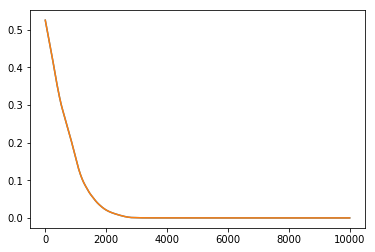

In [22]:
plt.plot(list(enumerate(range(len(rmse_a)))),rmse_a)

In [23]:
list(enumerate(range(10)))

[(0, 0),
 (1, 1),
 (2, 2),
 (3, 3),
 (4, 4),
 (5, 5),
 (6, 6),
 (7, 7),
 (8, 8),
 (9, 9)]

In [25]:
print (rmse_a[-1])

9.198684e-05
